In [ ]:
# Mapeamento arquivos do Excel usados no Google Drive


In [1]:
# Carregamento ddo dataframe com base nas aulas anteriores

import pandas as pd
import matplotlib.pyplot as plt
df_aju = pd.read_excel("/content/drive/MyDrive/DioDataBases-Pandas/Aracaju.xlsx")
df_fla = pd.read_excel("/content/drive/MyDrive/DioDataBases-Pandas/Fortaleza.xlsx")
df_ntl = pd.read_excel("/content/drive/MyDrive/DioDataBases-Pandas/Natal.xlsx")
df_rce = pd.read_excel("/content/drive/MyDrive/DioDataBases-Pandas/Recife.xlsx")
df_sdr = pd.read_excel("/content/drive/MyDrive/DioDataBases-Pandas/Salvador.xlsx")
df = pd.concat([df_aju, df_fla, df_ntl, df_rce, df_sdr])
df["LojaID"]=df["LojaID"].astype("object")
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)
df.dropna(inplace = True)
df["Receita"] = df["Vendas"].mul(df["Qtde"])

df["Ano_Venda"] = df["Data"].dt.year
df["Mes_venda"], df["Dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)
df["Diferença_dias"] = df["Data"] - df["Data"].min()
df["Trimestre_venda"] = df["Data"].dt.quarter
vendas_marco_2019 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [2]:
# Uso do value_counts para obtenção dos totais de cada coluna

df["LojaID"].value_counts(ascending=False)

# Mostra todas as vendas efetuadas em cada Loja

1036.0    117
1035.0    112
1037.0    101
1034.0     67
983.0      65
982.0      44
1522.0     40
1520.0     39
980.0      36
981.0      31
1005.0     30
1002.0     30
852.0      29
1523.0     29
1004.0     28
854.0      28
853.0      26
1521.0     21
1003.0     20
Name: LojaID, dtype: int64

In [3]:
import matplotlib.pyplot as plt

In [ ]:
# Criando grafico a partir dos dados acima com a bliblioteca mathplotlib
# https://matplotlib.org/
# https://matplotlib.org/stable/gallery/index

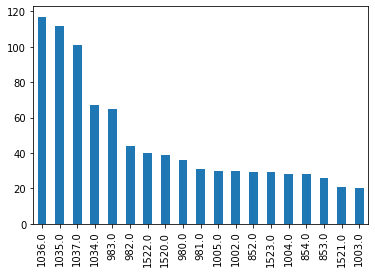

In [4]:
# Gráfico de barras com o total de vendas por loja

df["LojaID"].value_counts(ascending=False).plot.bar()

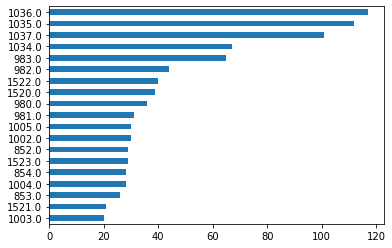

In [6]:
# Gráfico de barras horizontais com o total de vendas por loja

df["LojaID"].value_counts(ascending=True).plot.barh()

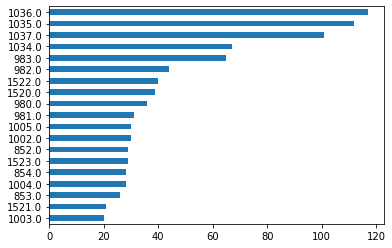

In [7]:
# Gráfico de barras horizontais sem mostrar a legenda superior (Colocando ;)

df["LojaID"].value_counts(ascending=True).plot.barh();

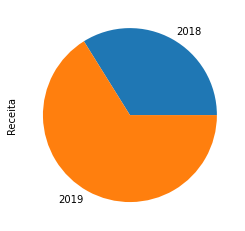

In [11]:
# Gráfico de Pizza

df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [14]:
# Filtrando o total de vendas por cidade

df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      129
Name: Cidade, dtype: int64

# **Pesonalização dos gráficos**

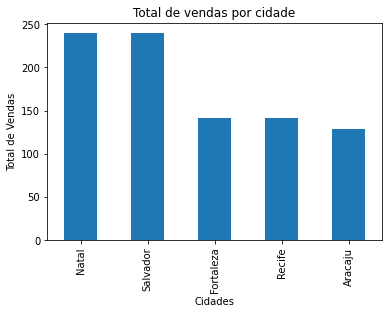

In [16]:
# Adicionando um título e alterando o nome dos eixos de um gráfico de barras

import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidades")
plt.ylabel("Total de Vendas");

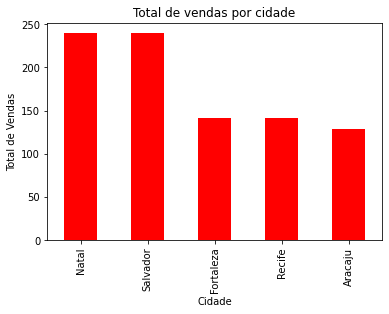

In [17]:
# Adicionando cor

df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas");

In [18]:
# Alterando o estilo default para ggplot 

plt.style.use("ggplot")

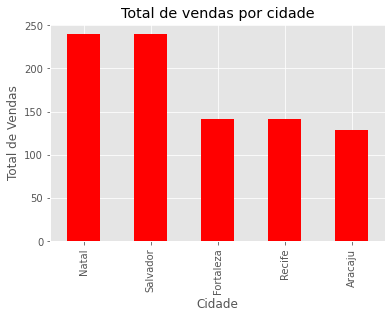

In [25]:
# Plotando novamente o gráfico acima com novo estilo

df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total de Vendas");

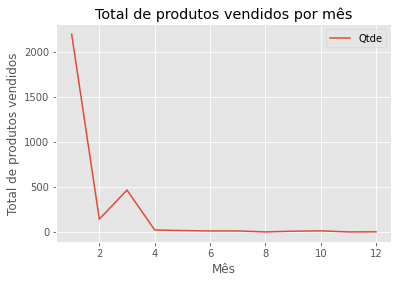

In [32]:
# Gráfico de Quantidade de vendas por mês usando novo estilo

df.groupby(df["Mes_venda"])["Qtde"].sum().plot(title = "Total de produtos vendidos por mês")
plt.xlabel("Mês");
plt.ylabel("Total de produtos vendidos");
plt.legend()

In [30]:
# Outro exemplo. Agrupamento do total de produtos vendidos por mês nos anos 2018 e 2019

df.groupby(df["Mes_venda"])["Qtde"].sum()

Mes_venda
1     2199.0
2      144.0
3      467.0
4       23.0
5       17.0
6       13.0
7       13.0
8        2.0
9       10.0
10      14.0
11       2.0
12       3.0
Name: Qtde, dtype: float64

In [6]:
# Selecionando apenas as vendas de 2019 na variável df_2019

df_2019 = df[df["Ano_Venda"] == 2019]

In [7]:
df_2019.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_venda,Dia_venda,Diferença_dias,Trimestre_venda
52,Recife,2019-01-01,11.87,981.0,6.0,71.22,2019,1,1,365 days,1
22,Salvador,2019-01-01,32.57,1035.0,1.0,32.57,2019,1,1,365 days,1
65,Natal,2019-04-05,292.00,852.0,2.0,584.00,2019,4,5,459 days,2
14,Salvador,2019-01-12,109.01,1035.0,2.0,218.02,2019,1,12,376 days,1
137,Fortaleza,2019-03-02,51.99,983.0,3.0,155.97,2019,3,2,425 days,1


In [39]:
df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum()

Mes_venda
1    1541.0
2     128.0
3     460.0
4      12.0
Name: Qtde, dtype: float64

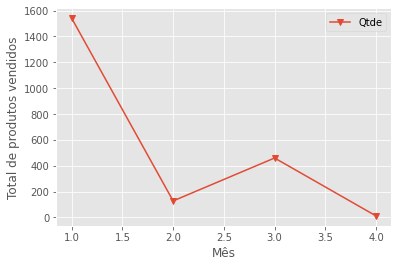

In [38]:
# Gerando gráfico do Total de produtos vendidos por mês em 2019 conforme tabela acima

df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês");
plt.ylabel("Total de produtos vendidos");
plt.legend()

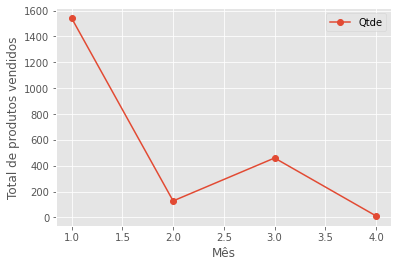

In [40]:
# Mesmo gráfico mudando o marcador (marker = "o")

df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês");
plt.ylabel("Total de produtos vendidos");
plt.legend()

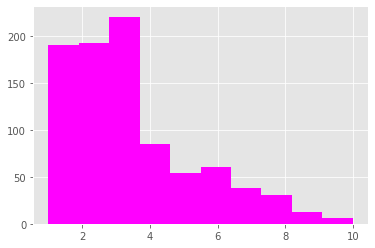

In [41]:
# Gráfico de Histograma

# https://matplotlib.org/2.0.2/examples/color/named_colors.html

plt.hist(df["Qtde"], color = "magenta");

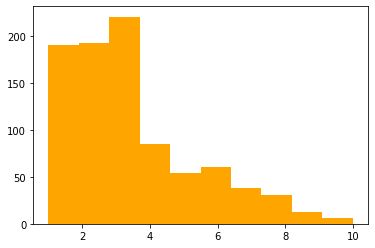

In [5]:
plt.hist(df["Qtde"], color = "orange");

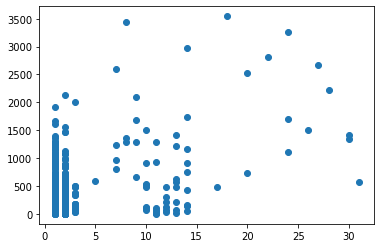

In [9]:
# Gráfico de dispersão (Scatter graphic) 

plt.scatter(x=df_2019["Dia_venda"], y = df_2019["Receita"]);

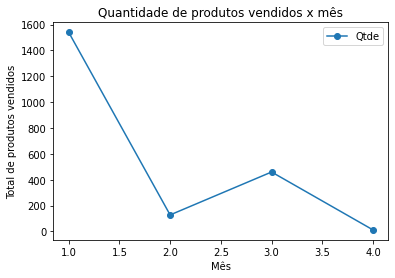

In [12]:
# Salvando os gráficos (Arquivo fica disponível em Files no menu vertical lateral do notebook)

# Mesmo gráfico anteriormente criado mudando o marcador (marker = "o")

df_2019.groupby(df_2019["Mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês");
plt.ylabel("Total de produtos vendidos");
plt.legend()
plt.savefig("GraficoQteProdxMes.png")